In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath=r'C:\Users\kisho\OneDrive\Desktop\Test jupyter\HousePricePrediction.xlsx'

dataset = pd.read_excel(filepath)

print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [12]:
dataset.shape


(2919, 13)

In [13]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


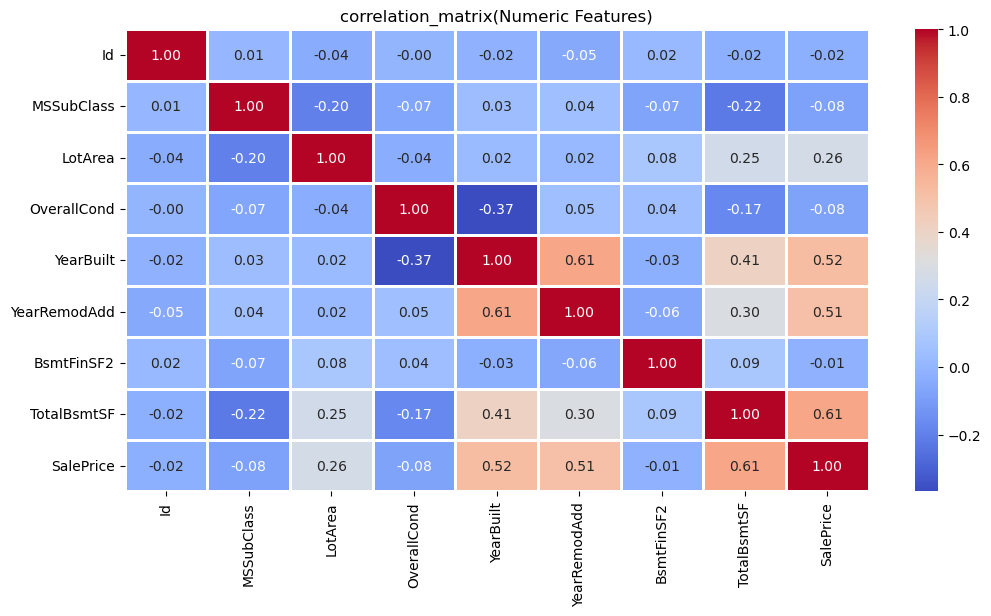

In [14]:
numeric_columns=dataset.select_dtypes(include=[np.number])
correlation_matrix=numeric_columns.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidths=2)
plt.title('correlation_matrix(Numeric Features)')
plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

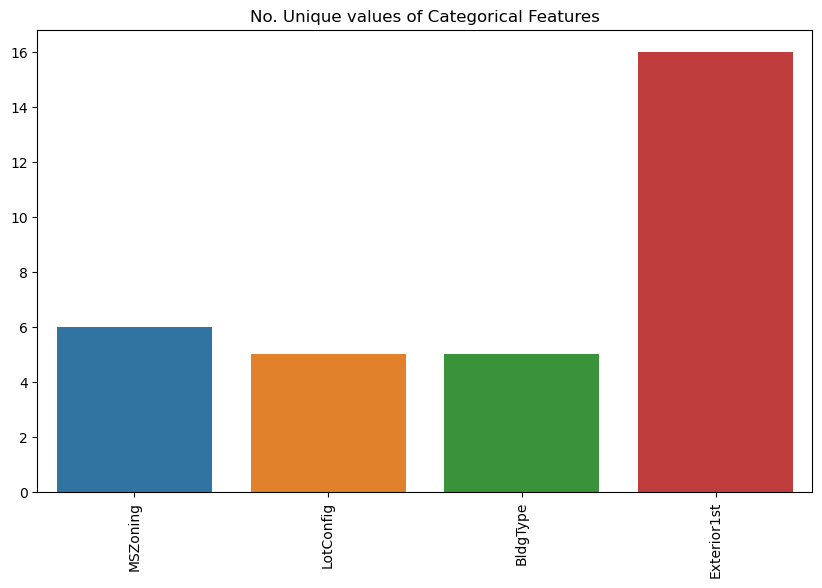

In [15]:
unique_values = []
for col in object_cols:
   unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


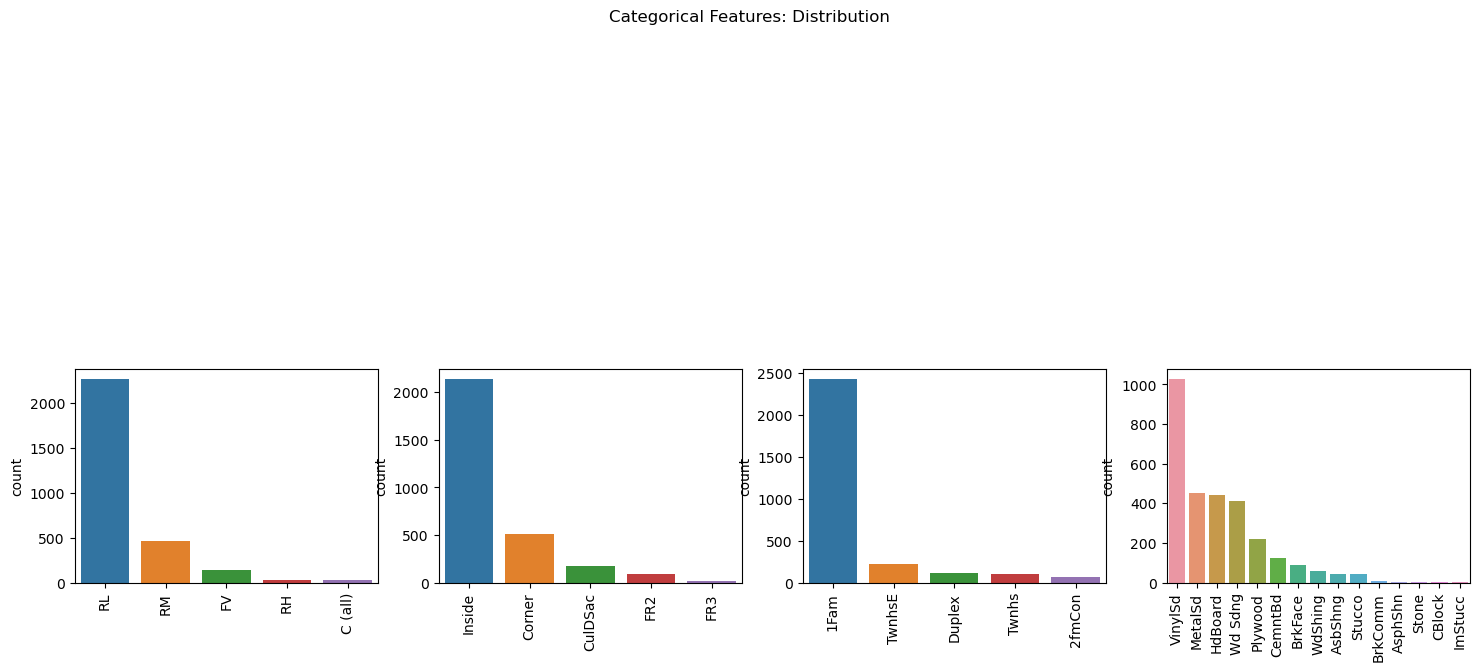

In [16]:
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution')
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [17]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [18]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [19]:
new_dataset = dataset.dropna()


In [20]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [22]:
from sklearn.preprocessing import LabelEncoder
object_cols=new_dataset.select_dtypes(include=['object']).columns
label_encoder=LabelEncoder()
for col in object_cols:
    new_dataset[col]=label_encoder.fit_transform(new_dataset[col])
df_final=new_dataset


C:\Users\kisho\AppData\Local\Temp\ipykernel_22048\520619230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col]=label_encoder.fit_transform(new_dataset[col])
C:\Users\kisho\AppData\Local\Temp\ipykernel_22048\520619230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[col]=label_encoder.fit_transform(new_dataset[col])
C:\Users\kisho\AppData\Local\Temp\ipykernel_22048\520619230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_pred))


0.18466666253038924
